<a href="https://colab.research.google.com/github/hasibkyau/HandwritingDigitRecognition/blob/main/Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

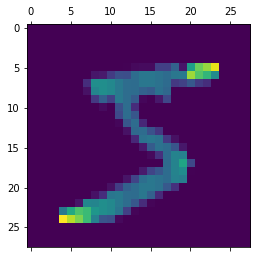

In [ ]:
len(x_train)
x_train[0].shape
#x_train[0]
plt.matshow(x_train[0])


In [ ]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

model.fit(x_train, y_train, epochs = 3)

model.save('handwritten.model')



Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2616 - accuracy: 0.9227
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1075 - accuracy: 0.9668
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0741 - accuracy: 0.9767
INFO:tensorflow:Assets written to: handwritten.model/assets


In [ ]:
model = tf.keras.models.load_model('handwritten.model')

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.9711
0.09079542011022568
0.9710999727249146


In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

NameError: ignored

this digit is probably a 0


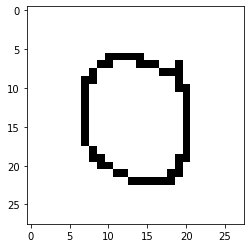

this digit is probably a 1


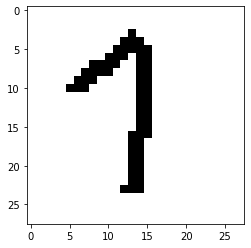

this digit is probably a 2


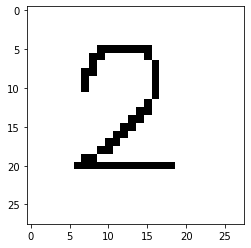

this digit is probably a 3


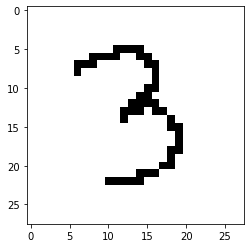

this digit is probably a 4


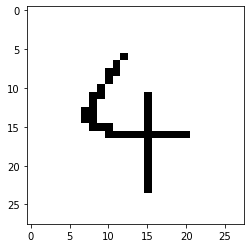

this digit is probably a 5


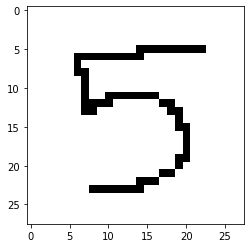

this digit is probably a 6


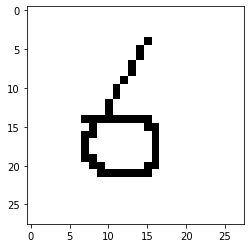

this digit is probably a 7


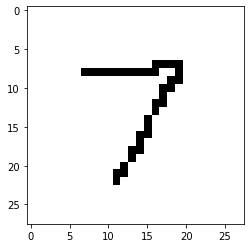

this digit is probably a 8


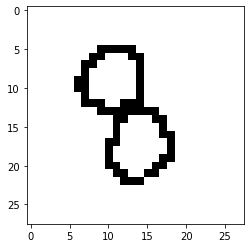

this digit is probably a 9


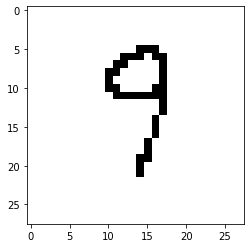

this digit is probably a 1


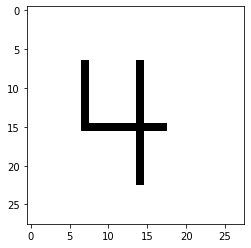

this digit is probably a 6


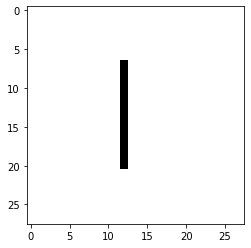

this digit is probably a 5


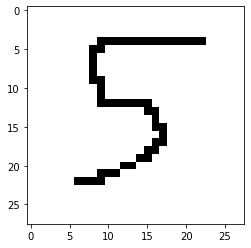

In [ ]:
image_number = 0
while os.path.isfile(f"/content/sample_data/digits/digit{image_number}.png"):
    try:
      img = cv2.imread(f"/content/sample_data/digits/digit{image_number}.png")[:, :, 0]
      img = np.invert(np.array([img]))
      prediction = model.predict(img)
      print(f"this digit is probably a {np.argmax(prediction)}")
      plt.imshow(img[0], cmap=plt.cm.binary)
      plt.show()
    except:
      print("Error!")
    finally:
      image_number += 1